___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

________
<a id="top"></a>
# Classification


## Contents
* <a href="#DataPrep1">Data Preparation Part 1</a>
* <a href="#DataPrep2">Data Preparation Part 2</a>
* <a href="#ModelEval1">Modeling and Evaluation 1</a>
* <a href="#ModelEval2">Modeling and Evaluation 2</a>
* <a href="#ModelEval3">Modeling and Evaluation 3</a>
    * <a href="#RFmodel">Random Forest Model</a>
    * <a href="#KNNmodel">KNN Model</a>
    * <a href="#SVMmodel">SVM Model</a>
* <a href="#ModelEval4">Modeling and Evaluation 4</a>
* <a href="#ModelEval5">Modeling and Evaluation 5</a>
    * <a href="#TaskEval">Comparing Task Performance Between Different Types of Models</a>
        * <a href="#sqrTask">On "share_quantile_range" Task</a>
        * <a href="#dowTask">On "day_of_week" Task</a>
        * <a href="#ncTask">On "news_category" Task</a>
    * <a href="#ScalerEval">Comparing the StandardScalar and QuantileTransformer Versions of The Models</a>
        * <a href="#RFEval">Random Forest Models</a>
        * <a href="#KNNEval">KNN Models</a>
        * <a href="#SVMEval">SVM Models</a>
* <a href="#ModelEval6">Modeling and Evaluation 6</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>

In [1]:
# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this import allows you train and test you test split
from sklearn.model_selection import train_test_split
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler, QuantileTransformer
# this import allows you to create a logistic regression model; type of machine learning model that can be used for classification tasks 
from sklearn.linear_model import LogisticRegression
# this import allows you to create a support vector machine SVM model, a type of ML model that can be used for classification tasks. 
from sklearn.svm import SVC
# this import allows you to perform CV on your model, a technique for evaluating the performance of a ML on unseen data
from sklearn.model_selection import cross_val_score
# these imports allow you to calculate various evaluation metrics for your ML model. Eval metrics are used to asses the performance of a ML on held-out test set. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# for testing differences with 95% confidence
from scipy.stats import ttest_rel
# for RandomForest models
from sklearn.ensemble import RandomForestClassifier
# for KNN models
from sklearn.neighbors import KNeighborsClassifier
# # for dimensionality reduction using PCA
# from sklearn.decomposition import PCA
# for feature selection
from sklearn.feature_selection import SelectKBest, f_classif
# this import allows for later feature selection
from sklearn.cluster import KMeans

In [2]:
# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


_________
<a href="#top">Back to Top</a>
<a id="DataPrep1"></a>
# Data Preparation Part 1 [10 points]

## Define and prepare your class variables.***

### Use proper variable representations (int, float, one-hot, etc.).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url_name                        39644 non-null  object 
 1   date                            39644 non-null  object 
 2   timedelta                       39644 non-null  float64
 3   n_tokens_title                  39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   average_token_length            39644 non-null  float64
 6   num_keywords                    39644 non-null  float64
 7   kw_min_min                      39644 non-null  float64
 8   kw_avg_min                      39644 non-null  float64
 9   kw_max_max                      39644 non-null  float64
 10  kw_avg_max                      39644 non-null  float64
 11  kw_min_avg                      39644 non-null  float64
 12  kw_max_avg                      

##### Original (before any cleaning):
url:        
    Containes the url of the article with the date      
    Object

timedelta:               
    Days between the article publication and the dataset acquisition (non-predictive)               
    float64

n_tokens_title:               
    Number of words in the title               
    float64

n_tokens_content:               
    Number of words in the content               
    float64

n_unique_tokens:               
    Rate of unique words in the content               
    float64

n_non_stop_words:           
    Rate of non-stop words in the content           
    float64

n_non_stop_unique_tokens:      
    Rate of unique non-stop words in the content      
    float64

num_hrefs:                    
    Number of links                 
    float64

num_self_hrefs:               
    Number of links to other articles published by Mashable            
    float64

num_imgs:                      
    Number of images        
    float64

num_videos:                    
    Number of videos            
    float64
    
average_token_length:               
    Average length of the words in the content               
    Float64

num_keywords:               
    Number of keywords in the metadata               
    float64

data_channel_is_lifestyle:     
    Is data channel 'Lifestyle'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_entertainment:          
    Is data channel 'Entertainment'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_bus:           
    Is data channel 'Business'?         
    Binary (Yes = 1 / No = 0)       
    float64
  
data_channel_is_socmed:        
    Is data channel 'Social Media'?             
    Binary (Yes = 1 / No = 0)       
    float64
   
data_channel_is_tech:          
    Is data channel 'Tech'?             
    Binary (Yes = 1 / No = 0)       
    float64
 
data_channel_is_world:         
    Is data channel 'World'?        
    Binary (Yes = 1 / No = 0)       
    float64
 
kw_min_min:               
    Worst keyword (min. shares)               
    float64

kw_max_min:                    
    Worst keyword (max. shares)         
    float64

kw_avg_min:                    
    Worst keyword (avg. shares)               
    float64

kw_min_max:                    
    Best keyword (min. shares)          
    float64

kw_max_max:                    
    Best keyword (max. shares)               
    float64

kw_avg_max:                    
    Best keyword (avg. shares)               
    float64

kw_min_avg:                    
    Avg. keyword (min. shares)               
    float64

kw_max_avg:                    
    Avg. keyword (max. shares)               
    float64

kw_avg_avg:                    
    Avg. keyword (avg. shares)          
    float64

self_reference_min_shares:    
    Min. shares of referenced articles in Mashable          
    float64

self_reference_max_shares:     
    Max. shares of referenced articles in Mashable          
    float64

self_reference_avg_sharess:   
    Avg. shares of referenced articles in Mashable          
    float64

weekday_is_monday:             
    Was the article published on a Monday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_tuesday:            
    Was the article published on a Tuesday?             
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_wednesday:          
    Was the article published on a Wednesday?               
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_thursday:           
    Was the article published on a Thursday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_friday:             
    Was the article published on a Friday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_saturday:           
    Was the article published on a Saturday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_sunday:              
    Was the article published on a Sunday?          
    Binary (Yes = 1 / No = 0)       
    float64

is_weekend:                    
    Was the article published on the weekend?               
    Binary (Yes = 1 / No = 0)       
    float64

LDA_00:                        
    LDA topic modeling 
    Closeness to LDA topic 0               
    float64

LDA_01:                       
    Closeness to LDA topic 1               
    float64

LDA_02:                        
    Closeness to LDA topic 2               
    float64

LDA_03:                       
    Closeness to LDA topic 3               
    float64

LDA_04:                        
    Closeness to LDA topic 4               
    float64

global_subjectivity:           
    Text subjectivity               
    float64

global_sentiment_polarity:     
    Text sentiment polarity               
    float64

global_rate_positive_words:    
    Rate of positive words in the content               
    float64

global_rate_negative_words:    
    Rate of negative words in the content               
    float64

rate_positive_words:           
    Rate of positive words among non-neutral tokens               
    float64

rate_negative_words:           
    Rate of negative words among non-neutral tokens               
    float64

avg_positive_polarity:         
    Avg. polarity of positive words               
    float64

min_positive_polarity:         
    Min. polarity of positive words               
    float64

max_positive_polarity:         
    Max. polarity of positive words               
    float64

avg_negative_polarity:         
    Avg. polarity of negative  words               
    float64

min_negative_polarity:         
    Min. polarity of negative  words               
    float64

max_negative_polarity:         
    Max. polarity of negative  words               
    float64

title_subjectivity:            
    Title subjectivity               
    float64

title_sentiment_polarity:      
    Title polarity               
    float64

abs_title_subjectivity:        
    Absolute subjectivity level               
    float64

abs_title_sentiment_polarity:  
    Absolute polarity level               
    float64

shares:                        
    Number of shares (target)               
    Integer

##### Newly Created (from after preeviously done cleaning & any transformations):
url_name:               
    URL of the article (non-predictive)               
    Float

Date:               
    The date the article was published               
    DateTime

Day_of_week:               
    What day of the week the article is posted on               
    Categorical

news_category:               
    What news category the article is               
    Categorical

Year:               
    The year the article was published               
    Integer

Month:               
    The month the aticle was published               
    Integer

log_shares:               
    log of the "shares" variable               
    Float

log_n_tokens_content:               
    log of the "n_tokens_content" variable               
    Float

log_num_hrefs:               
    log of the "num_hrefs" variable               
    Float

log_num_self_hrefs:               
    log of the "num_self_hrefs" variable               
    Float

log_num_imgs:               
    log of the "num_imgs" variable               
    Float

log_num_videos:               
    log of the "num_videos" variable               
    Float

log_kw_max_min:               
    log of the "kw_max_min" variable               
    Float

log_kw_min_max:               
    log of the "kw_min_max" variable               
    Float

log_kw_avg_avg:               
    log of the "kw_avg_avg" variable               
    Float

log_self_reference_min_shares:               
    log of the "self_reference_min_shares" variable               
    Float

log_self_reference_max_shares:               
    log of the "self_reference_max_shares" variable               
    Float

log_self_reference_avg_shares:               
    log of the "self_reference_avg_shares" variable               
    Float

day_of_weekX where X is the day of the week
    a binary value meaning either Yes (1) it is day X or No (0) it is not day x
     

### Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.

If your dataset has outliers, you may want to remove them before training your model, as outliers can skew the results of the model.

If your dataset has categorical variables, you need to encode them before training your model, as most machine learning algorithms can only handle numerical features.

In [3]:
# Remove certain columns before dimensionality reduction can take place

# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not useful

#Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
# df1 = pd.get_dummies(df1, drop_first=False,columns=['news_category'])

# Factor the `day_of_week` column for other two tasks.
# df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


In [4]:
# Create share_quantile_ranges_variable for target

# Create bins using quantiles
q1 = df1['shares'].quantile(0.25)
q2 = df1['shares'].quantile(0.5)
q3 = df1['shares'].quantile(0.75)

# Define the bin labels
labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# Cut the shares column into bins
df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

Scaling data

In [7]:
# Scale the features in the training and testing sets using standard scalar.
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [8]:
# Scale the features using QuantileTransformer with n_quantiles=100 AFTER using StandardScalar().
# quantile_transformer = QuantileTransformer(n_quantiles=100)

# X_train_q = quantile_transformer.fit_transform(X_train)
# X_test_q = scaler.transform(X_test)

Scaling is done on the training and testing sets "X_train" and "X_test" in order put the data on a common scale. This will helpful in improving the model performance as they  arre sensitive to the scale of the data. Scaling will be done for each classification task and both types of scaling will be done on the data seperately so that the two methods can be compared later.

Dimensionality Reduction

In [9]:
# Remove target
# X = df.drop(['share_ranges'], axis=1)
# y = df['share_ranges']
# print(X.columns)
# print(y)

# Training Test 80/20 Split
# random_state = 42

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [10]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()


### Remove variables that are not needed/useful for the analysis.

Certain variables were deemed unnecessary during lab 1 and were removed during the course of this labs notebook.

These variables were removed:

Url:        
    Dropped as it was better served being split into multiple variables.            
    These varriables did end up not being useful or useable, however.  

n_tokens_content:           
    was removed after being log transformed.            
    This helped with the very skewed data.

n_non_stop_words:              
    Deemed unhelpful

n_non_stop_unique_tokens:           
    Deemed unhelpful

num_hrefs:          
    was removed after being log transformed.            
    This helped with the very skewed data.

num_self_hrefs:         
    was removed after being log transformed.            
    This helped with the very skewed data.
    
num_imgs:           
    was removed after being log transformed.            
    This helped with the very skewed data.

num_videos:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_max_min:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_min_max:         
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_min_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_max_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_avg_sharess:             
    was removed after being log transformed.            
    This helped with the very skewed data.

weekday_is_X where X is the day of the week:        
    Removed previously.         
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of day_of_week.      

data_channel_is_X where X is the type of data channel:      
    Removed previously.     
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of news_category.        

In [5]:
# from previously cleaned dataset

# drop certain columns
# Done above
# df1 = df.drop('url_name', axis=1) # was a string
# df1 = df1.drop('date', axis=1) # datetime change didn't work.
# df1 = df1.drop('log_shares', axis=1) # not useful

# drop Na's
df1.dropna()

df1.head()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess,share_quantile_ranges
0,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590,<Q1
1,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888,Q1-Q2
2,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,Q1-Q2
3,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135,Q2-Q3
4,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199,Q2-Q3


url_name:           
    Dropped due to it being a string variable that wasn't useful

date:
    Dropped due to it being a datetime variable that wasn't useful

log_shares:
    Dropped due to it being a datetime variable that wasn't useful.             
    The share_quantile_ranges was deemed to be more useful.

All Na's were dropped

The shares, day_of_week, and news_category variables will be removed when selecting the target variable further down. Variables related to the current task will also be removed such as 'shares', 'day_of_week_Monday' (for example), and news_category_World (for example). This is to avoid these variables essentially giving the model the right answer

_________________
<a href="#top">Back to Top</a>
<a id="DataPrep2"></a>
# Data Preperation Part 2 [5 points]

## Describe the final dataset that is used for classification/regression
(include a description of any newly formed variables you created).

### share_quantile_ranges

In [6]:
# # Create bins using quantiles
# q1 = df1['shares'].quantile(0.25)
# q2 = df1['shares'].quantile(0.5)
# q3 = df1['shares'].quantile(0.75)

# # Define the bin labels
# labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# # Cut the shares column into bins
# df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

# Print the value counts of the share_ranges_quantile column
print(df1['share_quantile_ranges'].value_counts())

Q1-Q2    10152
Q2-Q3     9932
<Q1       9930
>Q3       9630
Name: share_quantile_ranges, dtype: int64


share_quantile_ranges: This was created by splitting up the shares variable into bins by using its different quantile values. This allowed for a more even split among the groups.

### factoring day_of_week

In [13]:
# # Factor the `day_of_week` column.
# df1 = pd.get_dummies(df1, columns=['day_of_week'])

factored day_of_week columns: day_of_week was factored back into 7 columns of 0's and 1's similar to how it was in the original dataset.

### factoring news_category

In [14]:
# # Factor the `news_category` column.
# df1 = pd.get_dummies(df1, columns=['news_category'])

factored news_category columns: day_of_week was factored back into 6 columns of 0's and 1's representative if it is that day or not similar to how it was in the original dataset.

In [7]:
df1.describe()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,0.548216,4.548239,7.223767,26.106801,312.366967,752324.066694,259281.938083,1117.146610,5657.211151,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,2013.540939,6.615856,5.889971,2.156564,1.208878,1.116427,0.400420,6.393888,5.045209,7.976327,6.195185,6.917477,6.667697
std,214.163767,2.114037,3.520708,0.844406,1.909130,69.633215,620.783887,214502.129573,135102.247285,1137.456951,6098.871957,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.498327,3.390683,1.255442,0.809445,0.692698,0.973755,0.680486,1.311168,4.521016,0.489467,3.076913,3.432430,3.280186
min,8.000000,2.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,0.470870,4.478404,6.000000,-1.000000,141.750000,843300.000000,172846.875000,0.000000,3562.101631,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,2013.000000,4.000000,5.509388,1.609438,0.693147,0.693147,0.000000,6.100319,0.000000,7.776304,6.461468,7.003974,6.889782
50%,339.000000,10.000000,0.539226,4.664082,7.000000,-1.000000,235.500000,843300.000000,244572.222223,1023.635611,4355.688836,0.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,2014.000000,7.000000,6.016157,2.197225,1.386294,0.693147,0.000000,6.493754,7.244942,7.962442,7.090910,7.937732,7.696667
75%,542.000000,12.000000,0.608696,4.854839,9.000000,4.000000,357.000000,843300.000000,330980.000000,2056.781032,6019.953968,0.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.0

________________
<a href="#top">Back to Top</a>
<a id="ModelEval1"></a>
# Modeling and Evaluation 1 (10 points total)

## Choose and explain your evaluation metrics that you will use: (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed).

### Why are the measure(s) appropriate for analyzing the results of your modeling?

### Give a detailed explanation backing up any assertions.

________________
<a href="#top">Back to Top</a>
<a id="ModelEval2"></a>
# Modeling and Evaluation 2 (10 points total)

## Choose the method you will use for dividing your data into training and testing splits

share_quantile_ranges task

In [8]:
# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X0 = pd.get_dummies(X0, columns=['news_category'])
X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
y1 = X0['share_quantile_ranges']
# print(X1.columns)
# print(y1)

# Splitting the Data for share_quantile_ranges task 
random_state = 42

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

day_of_week task

In [9]:
# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['news_category'])
X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
y2 = X0['day_of_week']
# print(X2.columns)
# print(y2)

# Splitting the Data for day_of_week task
random_state = 42

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

news_category task

In [10]:
# Splitting the Data for news_category task and other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X3 = X0.drop(['share_quantile_ranges', 'news_category'], axis=1) # Removing target categorical variable and other categorical variables
y3 = X0['news_category']
# print(X2.columns)
# print(y2)

random_state = 42

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=random_state)

### (i.e., are you using Stratified 10-fold cross validation? Why?).


### Explain why your chosen method is appropriate or use more than one method as appropriate.
For example, if you are using time series data then you should be using continuous training and testing sets across time.

________________
<a href="#top">Back to Top</a>
<a id="ModelEval3"></a>
# Modeling and Evaluation 3 (20 points total)

## Create three different classification/regression models (e.g., random forest,KNN, and SVM).

### Two modeling techniques must be new (but the third could be SVM or logistic regression).

In [11]:
# Scale the features in the training and testing sets using StandardScalar.
scaler = StandardScaler()

# Use previous train/test split

# for share_quantile_range_task
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# for day_of_week task
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# for news_category task
X_train2 = scaler.fit_transform(X_train3)
X_test2 = scaler.transform(X_test3)

In [12]:
# Scale the features in the training and testing sets using QuantileTransformer after using StandardScalar.
quantile_transformer = QuantileTransformer(n_quantiles=100)

# Use previous train/test split

# for share_quantile_range_task
X_train_q1 = quantile_transformer.fit_transform(X_train1)
X_test_q1 = quantile_transformer.fit_transform(X_test1)

# for day_of_week task
X_train_q2 = quantile_transformer.fit_transform(X_train2)
X_test_q2 = quantile_transformer.fit_transform(X_test2)

# for news_category task
X_train_q3 = quantile_transformer.fit_transform(X_train3)
X_test_q3 = quantile_transformer.fit_transform(X_test3)

________________
<a href="#top">Back to Top</a>
<a id="RFmodel"></a>
#### Random Forest

In [13]:
# Create the random forest model
rf = RandomForestClassifier(n_estimators=100)

##### share_quantile_ranges task

##### StandardScalar transformed

In [14]:
# Train the share_quantile_ranges model
rf.fit(X_train1, y_train1)

RandomForestClassifier()

In [15]:
# Make predictions on the test set for share_quantile_ranges task
rf_y_pred1 = rf.predict(X_test1)

In [16]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy1 = accuracy_score(y_test1, rf_y_pred1)
rf_precision1 = precision_score(y_test1, rf_y_pred1, average='macro')
rf_recall1 = recall_score(y_test1, rf_y_pred1, average='macro')
rf_f1_score1 = f1_score(y_test1, rf_y_pred1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores1 = np.array([rf_accuracy1, rf_precision1, rf_recall1, rf_f1_score1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy1)
print('Random Forest precision:', rf_precision1)
print('Random Forest recall:', rf_recall1)
print('Random Forest F1 score:', rf_f1_score1)

Random Forest on share_quantile_ranges Task
[0.39084374 0.38332748 0.39517545 0.38376316]
---------------------------------------------------------
Random Forest accuracy: 0.3908437381763148
Random Forest precision: 0.3833274767695355
Random Forest recall: 0.39517544779170993
Random Forest F1 score: 0.38376316156565693


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [19]:
# Dimensionality Reduction Using Feature Selection

# Create a SelectKBest object with k=10.
selector = SelectKBest(f_classif, k=10)

# Fit the selector to the data.
selector.fit(X_train1, y_train1)

# Get the selected features.
selected_features = selector.get_support()
print(selected_features)

[False False False False False False False False False False False  True
 False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
  True False False False False False  True False  True  True  True  True]


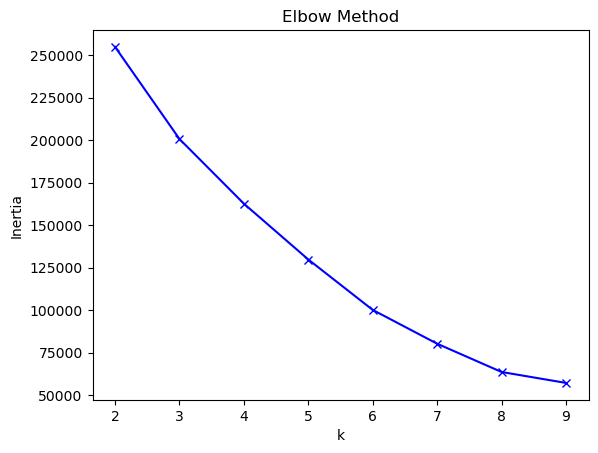

In [20]:

# Reduce the dataset to the selected features.
X_train1_reduced = X_train1[:, selected_features]
X_test1_reduced = X_test1[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# Calculate the inertia for different values of k.
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train1_reduced)
    inertias.append(kmeans.inertia_)

# Plot the inertia vs k.
plt.plot(range(2, 10), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [18]:
# Choose the value of k based on the elbow method.
k = 3

# Create a KMeans object with the chosen value of k.
kmeans = KMeans(n_clusters=k)

# Fit the KMeans object to the training data.
kmeans.fit(X_train1_reduced)

# Predict the cluster labels for the test data.
cluster_labels = kmeans.predict(X_test1_reduced)

##### QuantileTransformer transformed

In [26]:
# Train the share_quantile_ranges model
rf.fit(X_train_q1, y_train1)

RandomForestClassifier()

In [27]:
# Make predictions on the test set for share_quantile_ranges task
rf_y_pred_q1 = rf.predict(X_test_q1)

In [28]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy_q1 = accuracy_score(y_test1, rf_y_pred_q1)
rf_precision_q1 = precision_score(y_test1, rf_y_pred_q1, average='macro')
rf_recall_q1 = recall_score(y_test1, rf_y_pred_q1, average='macro')
rf_f1_score_q1 = f1_score(y_test1, rf_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q1 = np.array([rf_accuracy_q1, rf_precision_q1, rf_recall_q1, rf_f1_score_q1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores_q1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q1)
print('Random Forest precision:', rf_precision_q1)
print('Random Forest recall:', rf_recall_q1)
print('Random Forest F1 score:', rf_f1_score_q1)

Random Forest on share_quantile_ranges Task
[0.39374448 0.38777746 0.39769335 0.38825257]
---------------------------------------------------------
Random Forest accuracy: 0.3937444822802371
Random Forest precision: 0.38777746044716666
Random Forest recall: 0.3976933505118553
Random Forest F1 score: 0.3882525661656583


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [29]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar transformed

In [30]:
# Train the day_of_week task
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [31]:
# Make predictions on the test set for day_of_week task
rf_y_pred2 = rf.predict(X_test2)

In [32]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
rf_accuracy2 = accuracy_score(y_test2, rf_y_pred2)
rf_precision2 = precision_score(y_test2, rf_y_pred2, average='macro')
rf_recall2 = recall_score(y_test2, rf_y_pred2, average='macro')
rf_f1_score2 = f1_score(y_test2, rf_y_pred2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores2 = np.array([rf_accuracy2, rf_precision2, rf_recall2, rf_f1_score2])

# Print the model evaluation metrics
print('Random Forest on day_of_week Task')
print(rf_model_scores2)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy2)
print('Random Forest precision:', rf_precision2)
print('Random Forest recall:', rf_recall2)
print('Random Forest F1 score:', rf_f1_score2)

Random Forest on day_of_week Task
[1. 1. 1. 1.]
---------------------------------------------------------
Random Forest accuracy: 1.0
Random Forest precision: 1.0
Random Forest recall: 1.0
Random Forest F1 score: 1.0


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [33]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [34]:
# Train the day_of_week task
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [35]:
# Make predictions on the test set for day_of_week task
rf_y_pred_q2 = rf.predict(X_test2)

In [36]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
rf_accuracy_q2 = accuracy_score(y_test2, rf_y_pred_q2)
rf_precision_q2 = precision_score(y_test2, rf_y_pred_q2, average='macro')
rf_recall_q2 = recall_score(y_test2, rf_y_pred_q2, average='macro')
rf_f1_score_q2 = f1_score(y_test2, rf_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q2 = np.array([rf_accuracy_q2, rf_precision_q2, rf_recall_q2, rf_f1_score_q2])

# Print the model evaluation metrics
print('Random Forest on day_of_week Task')
print(rf_model_scores_q2)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q2)
print('Random Forest precision:', rf_precision_q2)
print('Random Forest recall:', rf_recall_q2)
print('Random Forest F1 score:', rf_f1_score_q2)

Random Forest on day_of_week Task
[1. 1. 1. 1.]
---------------------------------------------------------
Random Forest accuracy: 1.0
Random Forest precision: 1.0
Random Forest recall: 1.0
Random Forest F1 score: 1.0


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [37]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task

##### StandardScalar transformed

In [38]:
# Train the news_category task
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [39]:
# Make predictions on the test set for news_category task
rf_y_pred3 = rf.predict(X_test3)

In [40]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy3 = accuracy_score(y_test3, rf_y_pred3)
rf_precision3 = precision_score(y_test3, rf_y_pred3, average='macro')
rf_recall3 = recall_score(y_test3, rf_y_pred3, average='macro')
rf_f1_score3 = f1_score(y_test3, rf_y_pred3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores3 = np.array([rf_accuracy3, rf_precision3, rf_recall3, rf_f1_score3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy3)
print('Random Forest precision:', rf_precision3)
print('Random Forest recall:', rf_recall3)
print('Random Forest F1 score:', rf_f1_score3)

Random Forest on news_category Task
[0.81624417 0.82082779 0.71468907 0.7235827 ]
---------------------------------------------------------
Random Forest accuracy: 0.8162441669819649
Random Forest precision: 0.8208277899923283
Random Forest recall: 0.7146890720493634
Random Forest F1 score: 0.7235826999071798


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [41]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [42]:
# Train the news_category task
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [43]:
# Make predictions on the test set for news_category task
rf_y_pred_q3 = rf.predict(X_test3)

In [44]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy_q3 = accuracy_score(y_test3, rf_y_pred_q3)
rf_precision_q3 = precision_score(y_test3, rf_y_pred_q3, average='macro')
rf_recall_q3 = recall_score(y_test3, rf_y_pred_q3, average='macro')
rf_f1_score_q3 = f1_score(y_test3, rf_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q3 = np.array([rf_accuracy_q3, rf_precision_q3, rf_recall_q3, rf_f1_score_q3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores_q3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q3)
print('Random Forest precision:', rf_precision_q3)
print('Random Forest recall:', rf_recall_q3)
print('Random Forest F1 score:', rf_f1_score_q3)

Random Forest on news_category Task
[0.81498297 0.81429472 0.71438119 0.72217952]
---------------------------------------------------------
Random Forest accuracy: 0.8149829738933031
Random Forest precision: 0.8142947234710928
Random Forest recall: 0.7143811877045928
Random Forest F1 score: 0.7221795198084988


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [45]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

________________
<a href="#top">Back to Top</a>
<a id="KNNmodel"></a>
#### KNN

In [46]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

##### share_quantile_ranges task

##### StandardScalar transformed

In [47]:
# Train the model for the share_quantile_ranges task.
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [48]:
# Make predictions on the test set for the share_quantile_ranges task.
knn_y_pred1 = knn.predict(X_test1)

In [49]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy1 = accuracy_score(y_test1, knn_y_pred1)
knn_precision1 = precision_score(y_test1, knn_y_pred1, average='macro')
knn_recall1 = recall_score(y_test1, knn_y_pred1, average='macro')
knn_f1_score1 = f1_score(y_test1, knn_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores1 = np.array([knn_accuracy1, knn_precision1, knn_recall1, knn_f1_score1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy1)
print('KNN precision:', knn_precision1)
print('KNN recall:', knn_recall1)
print('KNN F1 score:', knn_f1_score1)

KNN on share_quantile_ranges Task
[0.32828856 0.32295618 0.33085322 0.31916453]
---------------------------------------------------------
KNN accuracy: 0.32828856097868586
KNN precision: 0.3229561810198724
KNN recall: 0.330853223797068
KNN F1 score: 0.3191645293080165


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [50]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [51]:
# Train the model for the share_quantile_ranges task.
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [52]:
# Make predictions on the test set for the share_quantile_ranges task.
knn_y_pred_q1 = knn.predict(X_test1)

In [53]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy_q1 = accuracy_score(y_test1, knn_y_pred_q1)
knn_precision_q1 = precision_score(y_test1, knn_y_pred_q1, average='macro')
knn_recall_q1 = recall_score(y_test1, knn_y_pred_q1, average='macro')
knn_f1_score_q1 = f1_score(y_test1, knn_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores_q1 = np.array([knn_accuracy_q1, knn_precision_q1, knn_recall_q1, knn_f1_score_q1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores_q1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q1)
print('KNN precision:', knn_precision_q1)
print('KNN recall:', knn_recall_q1)
print('KNN F1 score:', knn_f1_score_q1)

KNN on share_quantile_ranges Task
[0.32828856 0.32295618 0.33085322 0.31916453]
---------------------------------------------------------
KNN accuracy: 0.32828856097868586
KNN precision: 0.3229561810198724
KNN recall: 0.330853223797068
KNN F1 score: 0.3191645293080165


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [54]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar transformed

In [55]:
# Train the model for the day_of_week task.
knn.fit(X_train2, y_train2)

KNeighborsClassifier()

In [56]:
# Make predictions on the test set for the day_of_week task.
knn_y_pred2 = knn.predict(X_test2)

In [57]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
knn_accuracy2 = accuracy_score(y_test2, knn_y_pred2)
knn_precision2 = precision_score(y_test2, knn_y_pred2, average='macro')
knn_recall2 = recall_score(y_test2, knn_y_pred2, average='macro')
knn_f1_score2 = f1_score(y_test2, knn_y_pred2, average='macro')

# Create an array to store the model evaluation metrics the day_of_week task.
knn_model_scores2 = np.array([knn_accuracy2, knn_precision2, knn_recall2, knn_f1_score2])
print('KNN on day_of_week Task')
print(knn_model_scores2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy2)
print('KNN precision:', knn_precision2)
print('KNN recall:', knn_recall2)
print('KNN F1 score:', knn_f1_score2)

KNN on day_of_week Task
[0.99508135 0.9959603  0.99541309 0.99568533]
---------------------------------------------------------
KNN accuracy: 0.9950813469542187
KNN precision: 0.9959603049279665
KNN recall: 0.9954130877480053
KNN F1 score: 0.9956853318250927


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [58]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [59]:
# Train the model for the day_of_week task.
knn.fit(X_train2, y_train2)

KNeighborsClassifier()

In [60]:
# Make predictions on the test set for the day_of_week task.
knn_y_pred_q2 = knn.predict(X_test2)

In [61]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
knn_accuracy_q2 = accuracy_score(y_test2, knn_y_pred_q2)
knn_precision_q2 = precision_score(y_test2, knn_y_pred_q2, average='macro')
knn_recall_q2 = recall_score(y_test2, knn_y_pred_q2, average='macro')
knn_f1_score_q2 = f1_score(y_test2, knn_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics the day_of_week task.
knn_model_scores_q2 = np.array([knn_accuracy_q2, knn_precision_q2, knn_recall_q2, knn_f1_score_q2])
print('KNN on day_of_week Task')
print(knn_model_scores_q2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q2)
print('KNN precision:', knn_precision_q2)
print('KNN recall:', knn_recall_q2)
print('KNN F1 score:', knn_f1_score_q2)

KNN on day_of_week Task
[0.99508135 0.9959603  0.99541309 0.99568533]
---------------------------------------------------------
KNN accuracy: 0.9950813469542187
KNN precision: 0.9959603049279665
KNN recall: 0.9954130877480053
KNN F1 score: 0.9956853318250927


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [62]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task

##### StandardScalar transformed

In [63]:
# Train the model for the news_category task.
knn.fit(X_train3, y_train3)

KNeighborsClassifier()

In [64]:
# Make predictions on the test set for the news_category task.
knn_y_pred3 = knn.predict(X_test3)

In [65]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy3 = accuracy_score(y_test3, knn_y_pred3)
knn_precision3 = precision_score(y_test3, knn_y_pred3, average='macro')
knn_recall3 = recall_score(y_test3, knn_y_pred3, average='macro')
knn_f1_score3 = f1_score(y_test3, knn_y_pred3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores3 = np.array([knn_accuracy3, knn_precision3, knn_recall3, knn_f1_score3])
print('KNN on news_category Task')
print(knn_model_scores3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy3)
print('KNN precision:', knn_precision3)
print('KNN recall:', knn_recall3)
print('KNN F1 score:', knn_f1_score3)

KNN on news_category Task
[0.39563627 0.35235025 0.3457044  0.34365525]
---------------------------------------------------------
KNN accuracy: 0.3956362719132299
KNN precision: 0.3523502516748679
KNN recall: 0.3457044013980392
KNN F1 score: 0.3436552451578701


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [66]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [67]:
# Train the model for the news_category task.
knn.fit(X_train3, y_train3)

KNeighborsClassifier()

In [68]:
# Make predictions on the test set for the news_category task.
knn_y_pred_q3 = knn.predict(X_test3)

In [69]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy_q3 = accuracy_score(y_test3, knn_y_pred_q3)
knn_precision_q3 = precision_score(y_test3, knn_y_pred_q3, average='macro')
knn_recall_q3 = recall_score(y_test3, knn_y_pred_q3, average='macro')
knn_f1_score_q3 = f1_score(y_test3, knn_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores_q3 = np.array([knn_accuracy_q3, knn_precision_q3, knn_recall_q3, knn_f1_score_q3])
print('KNN on news_category Task')
print(knn_model_scores_q3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q3)
print('KNN precision:', knn_precision_q3)
print('KNN recall:', knn_recall_q3)
print('KNN F1 score:', knn_f1_score_q3)

KNN on news_category Task
[0.39563627 0.35235025 0.3457044  0.34365525]
---------------------------------------------------------
KNN accuracy: 0.3956362719132299
KNN precision: 0.3523502516748679
KNN recall: 0.3457044013980392
KNN F1 score: 0.3436552451578701


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [70]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

________________
<a href="#top">Back to Top</a>
<a id="SVMmodel"></a>
#### SVM

##### share_quantile_ranges task

In [71]:
# Set the model parameters
C = 1.0
kernel = 'linear'

# Create the support vector machine model
support_vector_machine_model = SVC(C=C, kernel=kernel)

##### StandardScalar transformed

In [72]:
# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
support_vector_machine_model.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test data for the share_quantile_ranges task.
svm_y_pred1 = support_vector_machine_model.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy1 = accuracy_score(y_test1, svm_y_pred1)
svm_precision1 = precision_score(y_test1, svm_y_pred1, average='macro')
svm_recall1 = recall_score(y_test1, svm_y_pred1, average='macro')
svm_f1_score1 = f1_score(y_test1, svm_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores1 = np.array([svm_accuracy1, svm_precision1, svm_recall1, svm_f1_score1])
print('SVM on share_quantile_range Task')
print(svm_model_scores1)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy1)
print('Support vector machine precision:', svm_precision1)
print('Support vector machine recall:', svm_recall1)
print('Support vector machine F1 score:', svm_f1_score1)

SVM on share_quantile_range Task
[0.37255644 0.36868542 0.37654237 0.36407059]
---------------------------------------------------------
Support vector machine accuracy: 0.3725564383907176
Support vector machine precision: 0.3686854186577442
Support vector machine recall: 0.376542368765497
Support vector machine F1 score: 0.3640705895379336


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
support_vector_machine_model.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test data for the share_quantile_ranges task.
svm_y_pred_q1 = support_vector_machine_model.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy_q1 = accuracy_score(y_test1, svm_y_pred_q1)
svm_precision_q1 = precision_score(y_test1, svm_y_pred_q1, average='macro')
svm_recall_q1 = recall_score(y_test1, svm_y_pred_q1, average='macro')
svm_f1_score_q1 = f1_score(y_test1, svm_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores_q1 = np.array([svm_accuracy_q1, svm_precision_q1, svm_recall_q1, svm_f1_score_q1])
print('SVM on share_quantile_range Task')
print(svm_model_scores_q1)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy_q1)
print('Support vector machine precision:', svm_precision_q1)
print('Support vector machine recall:', svm_recall_q1)
print('Support vector machine F1 score:', svm_f1_score_q1)

SVM on share_quantile_range Task
[0.37255644 0.36868542 0.37654237 0.36407059]
---------------------------------------------------------
Support vector machine accuracy: 0.3725564383907176
Support vector machine precision: 0.3686854186577442
Support vector machine recall: 0.376542368765497
Support vector machine F1 score: 0.3640705895379336


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
support_vector_machine_model.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test data for the day_of_week task.
svm_y_pred2 = support_vector_machine_model.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
svm_accuracy2 = accuracy_score(y_test2, svm_y_pred2)
svm_precision2 = precision_score(y_test2, svm_y_pred2, average='macro')
svm_recall2 = recall_score(y_test2, svm_y_pred2, average='macro')
svm_f1_score2 = f1_score(y_test2, svm_y_pred2, average='macro')

# Create an array to store the model evaluation metrics for the day_of_week task
svm_model_scores2 = np.array([svm_accuracy2, svm_precision2, svm_recall2, svm_f1_score2])
print('SVM on day_of_week Task')
print(svm_model_scores2)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy2)
print('Support vector machine precision:', svm_precision2)
print('Support vector machine recall:', svm_recall2)
print('Support vector machine F1 score:', svm_f1_score2)

SVM on day_of_week Task
[1. 1. 1. 1.]
---------------------------------------------------------
Support vector machine accuracy: 1.0
Support vector machine precision: 1.0
Support vector machine recall: 1.0
Support vector machine F1 score: 1.0


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
support_vector_machine_model.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
# Make predictions on the test data for the day_of_week task.
svm_y_pred_q2 = support_vector_machine_model.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
svm_accuracy_q2 = accuracy_score(y_test2, svm_y_pred_q2)
svm_precision_q2 = precision_score(y_test2, svm_y_pred_q2, average='macro')
svm_recall_q2 = recall_score(y_test2, svm_y_pred_q2, average='macro')
svm_f1_score_q2 = f1_score(y_test2, svm_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics for the day_of_week task
svm_model_scores_q2 = np.array([svm_accuracy_q2, svm_precision_q2, svm_recall_q2, svm_f1_score_q2])
print('SVM on day_of_week Task')
print(svm_model_scores_q2)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy_q2)
print('Support vector machine precision:', svm_precision_q2)
print('Support vector machine recall:', svm_recall_q2)
print('Support vector machine F1 score:', svm_f1_score_q2)

SVM on day_of_week Task
[1. 1. 1. 1.]
---------------------------------------------------------
Support vector machine accuracy: 1.0
Support vector machine precision: 1.0
Support vector machine recall: 1.0
Support vector machine F1 score: 1.0


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task
This task appears to be incompatible with the SVM model as it takes too long to train the model

##### StandardScalar transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test data for the news_category task.
# svm_y_pred3 = support_vector_machine_model.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy3 = accuracy_score(y_test3, svm_y_pred3)
# svm_precision3 = precision_score(y_test3, svm_y_pred3, average='macro')
# svm_recall3 = recall_score(y_test3, svm_y_pred3, average='macro')
# svm_f1_score3 = f1_score(y_test3, svm_y_pred3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores3 = np.array([svm_accuracy3, svm_precision3, svm_recall3, svm_f1_score3])
# print('SVM on news_category Task')
# print(svm_model_scores3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy3)
# print('Support vector machine precision:', svm_precision3)
# print('Support vector machine recall:', svm_recall3)
# print('Support vector machine F1 score:', svm_f1_score3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# # Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train3, y_train3)

In [ ]:
# # Make predictions on the test data for the news_category task.
# svm_y_pred_q3 = support_vector_machine_model.predict(X_test3)

In [ ]:
# # Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy_q3 = accuracy_score(y_test3, svm_y_pred_q3)
# svm_precision_q3 = precision_score(y_test3, svm_y_pred_q3, average='macro')
# svm_recall_q3 = recall_score(y_test3, svm_y_pred_q3, average='macro')
# svm_f1_score_q3 = f1_score(y_test3, svm_y_pred_q3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores_q3 = np.array([svm_accuracy_q3, svm_precision_q3, svm_recall_q3, svm_f1_score_q3])
# print('SVM on news_category Task')
# print(svm_model_scores_q3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy_q3)
# print('Support vector machine precision:', svm_precision_q3)
# print('Support vector machine recall:', svm_recall_q3)
# print('Support vector machine F1 score:', svm_f1_score_q3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

________________
<a href="#top">Back to Top</a>
<a id="ModelEval4"></a>
# Modeling and Evaluation 4 (10 points total)

## Analyze the results using your chosen method of evaluation.

### Use visualizations of the results to bolster the analysis.


### Explain any visuals and analyze why they are interesting to someone that might use this model.

<a href="#top">Back to Top</a>
<a id="ModelEval5"></a>
# Modeling and Evaluation 5 (10 points total)

## Discuss the advantages of each model for each classification task, if any.

### If there are not advantages, explain why.

#### K-Nearest Neighbors (KNN)


#### Random Forest


#### Support Vector Machine (SVM)


### Is any model better than another?

<a href="#top">Back to Top</a>
<a id="TaskEval"></a>
### Is the difference significant with 95% confidence? Use proper statistical comparison methods.

<a id="sqrTask"></a>
#### share_quantile_ranges task
StandardScalar transformed

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1) # share_quantile_ranges task
print(knn_model_scores1) # day_of_week task
print(svm_model_scores1) # news_category task

[0.38882583 0.38187295 0.39284229 0.38323132]
[0.32828856 0.32295618 0.33085322 0.31916453]
[0.37255644 0.36868542 0.37654237 0.36407059]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores1
model2_scores = knn_model_scores1
model3_scores = svm_model_scores1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------
Random Forest vs. SVM
The difference between the two models is statistically significant.
---------------------------------------------------------
KNN vs. SVM
The difference between the two models is statistically significant.


QuantileTransformer transformed

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q1) # share_quantile_ranges task
print(knn_model_scores_q1) # day_of_week task
print(svm_model_scores_q1) # news_category task

[0.38819523 0.38096569 0.39230118 0.3811419 ]
[0.32828856 0.32295618 0.33085322 0.31916453]
[0.37255644 0.36868542 0.37654237 0.36407059]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q1
model2_scores = knn_model_scores_q1
model3_scores = svm_model_scores_q1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------
Random Forest vs. SVM
The difference between the two models is statistically significant.
---------------------------------------------------------
KNN vs. SVM
The difference between the two models is statistically significant.


<a href="#top">Back to Top</a>
<a id="dowTask"></a>
#### day_of_week task
StandardScalar transformed

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores2) # share_quantile_ranges task
print(knn_model_scores2) # day_of_week task
print(svm_model_scores2) # news_category task

[1. 1. 1. 1.]
[0.99508135 0.9959603  0.99541309 0.99568533]
[1. 1. 1. 1.]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores2
model2_scores = knn_model_scores2
model3_scores = svm_model_scores2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------
Random Forest vs. SVM
The difference between the two models is not statistically significant.
---------------------------------------------------------
KNN vs. SVM
The difference between the two models is not statistically significant.


QuantileTransformer transformed

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q2) # share_quantile_ranges task
print(knn_model_scores_q2) # day_of_week task
print(svm_model_scores_q2) # news_category task

[1. 1. 1. 1.]
[0.99508135 0.9959603  0.99541309 0.99568533]
[1. 1. 1. 1.]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q2
model2_scores = knn_model_scores_q2
model3_scores = svm_model_scores_q2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------
Random Forest vs. SVM
The difference between the two models is not statistically significant.
---------------------------------------------------------
KNN vs. SVM
The difference between the two models is not statistically significant.


<a href="#top">Back to Top</a>
<a id="ncTask"></a>
#### news_category task

StandardScalar transformed

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores3) # share_quantile_ranges task
print(knn_model_scores3) # day_of_week task
# print(svm_model_scores_q2) # news_category task

[0.81674864 0.81776368 0.71656011 0.72450887]
[0.39563627 0.35235025 0.3457044  0.34365525]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores3
model2_scores = knn_model_scores3
# model3_scores = svm_model_scores3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------


QuantileTransformer transformed

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q3) # share_quantile_ranges task
print(knn_model_scores_q3) # day_of_week task
# print(svm_model_scores_q3) # news_category task

[0.81523521 0.80620665 0.71497814 0.72284859]
[0.39563627 0.35235025 0.3457044  0.34365525]


In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q3
model2_scores = knn_model_scores_q3
# model3_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------


<a href="#top">Back to Top</a>
<a id="ScalerEval"></a>
##### Now for determining if there is a statistically significant difference between transformation types StandardScalar & QuantileTransformation

<a id="RFEval"></a>
Random Forest Models

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1) # share_quantile_ranges task
print(rf_model_scores2) # day_of_week task
print(rf_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q1) # share_quantile_ranges task
print(rf_model_scores_q2) # day_of_week task
print(rf_model_scores_q3) # news_category task

[0.38882583 0.38187295 0.39284229 0.38323132]
[1. 1. 1. 1.]
[0.81674864 0.81776368 0.71656011 0.72450887]
[0.38819523 0.38096569 0.39230118 0.3811419 ]
[1. 1. 1. 1.]
[0.81523521 0.80620665 0.71497814 0.72284859]


In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = rf_model_scores1
model2_scores = rf_model_scores2
model3_scores = rf_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = rf_model_scores_q1
model5_scores = rf_model_scores_q2
model6_scores = rf_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest Models
StandardScalar vs. QuantileTransformation on share_quantile_ranges task
The difference between the two models is not statistically significant.
---------------------------------------------------------
StandardScalar vs. QuantileTransformation on day_of_week task
The difference between the two models is not statistically significant.
---------------------------------------------------------
StandardScalar vs. QuantileTransformation on news_category task
The difference between the two models is not statistically significant.


<a href="#top">Back to Top</a>
<a id="KNNEval"></a>

KNN models

In [ ]:
# StandardScalar transformed accuracy scores
print(knn_model_scores1) # share_quantile_ranges task
print(knn_model_scores2) # day_of_week task
print(knn_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(knn_model_scores_q1) # share_quantile_ranges task
print(knn_model_scores_q2) # day_of_week task
print(knn_model_scores_q3) # news_category task

[0.32828856 0.32295618 0.33085322 0.31916453]
[0.99508135 0.9959603  0.99541309 0.99568533]
[0.39563627 0.35235025 0.3457044  0.34365525]
[0.32828856 0.32295618 0.33085322 0.31916453]
[0.99508135 0.9959603  0.99541309 0.99568533]
[0.39563627 0.35235025 0.3457044  0.34365525]


In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = knn_model_scores1
model2_scores = knn_model_scores2
model3_scores = knn_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = knn_model_scores_q1
model5_scores = knn_model_scores_q2
model6_scores = knn_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest Models
StandardScalar vs. QuantileTransformation on share_quantile_ranges task
The difference between the two models is not statistically significant.
---------------------------------------------------------
StandardScalar vs. QuantileTransformation on day_of_week task
The difference between the two models is not statistically significant.
---------------------------------------------------------
StandardScalar vs. QuantileTransformation on news_category task
The difference between the two models is not statistically significant.


<a href="#top">Back to Top</a>
<a id="SVMEval"></a>

SVM models

In [ ]:
# StandardScalar transformed accuracy scores
print(svm_model_scores1) # share_quantile_ranges task
print(svm_model_scores2) # day_of_week task
# print(svm_model_scores1) # news_category task

# QuantileTransformer transformed accuracy scores
print(svm_model_scores_q1) # share_quantile_ranges task
print(svm_model_scores_q2) # day_of_week task
# print(svm_model_scores_q3) # news_category task

[0.37255644 0.36868542 0.37654237 0.36407059]
[1. 1. 1. 1.]
[0.37255644 0.36868542 0.37654237 0.36407059]
[1. 1. 1. 1.]


In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = svm_model_scores1
model2_scores = svm_model_scores2
# model3_scores = svm_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = svm_model_scores_q1
model5_scores = svm_model_scores_q2
# model6_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

# print("StandardScalar vs. QuantileTransformation on news_category task")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

Random Forest Models
StandardScalar vs. QuantileTransformation on share_quantile_ranges task
The difference between the two models is not statistically significant.
---------------------------------------------------------
StandardScalar vs. QuantileTransformation on day_of_week task
The difference between the two models is not statistically significant.
---------------------------------------------------------


________________
<a href="#top">Back to Top</a>
<a id="ModelEval6"></a>
# Modeling and Evaluation 6 (10 points total)

## Which attributes from your analysis are most important?

### Use proper methods discussed in class to evaluate the importance of different attributes.


### Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

________________
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
# Deployment (5 points total)

## How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?

### How would you measure the model's value if it was used by these parties?


### How would your deploy your model for interested parties?


### What other data should be collected?


### How often would the model need to be updated, etc.?

________________
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
# Exceptional Work (10 points total)

## You have free reign to provide additional modeling.

### One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm